In [22]:
# import libraries
import numpy as np
np.set_printoptions(precision = 4, suppress = True)
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [23]:
out_dir = "./data/out"
optim_dir = os.path.join(out_dir,"simulated-annealing")
res_dir = os.path.join(optim_dir, "06")

In [24]:
net_profit = pd.read_csv(os.path.join(res_dir, "curr-state-net-profit.csv"))
net_profit.head()

,net profit
0,9126.417969
1,9341.908203
2,12883.244141
3,202.699158
4,6312.443848


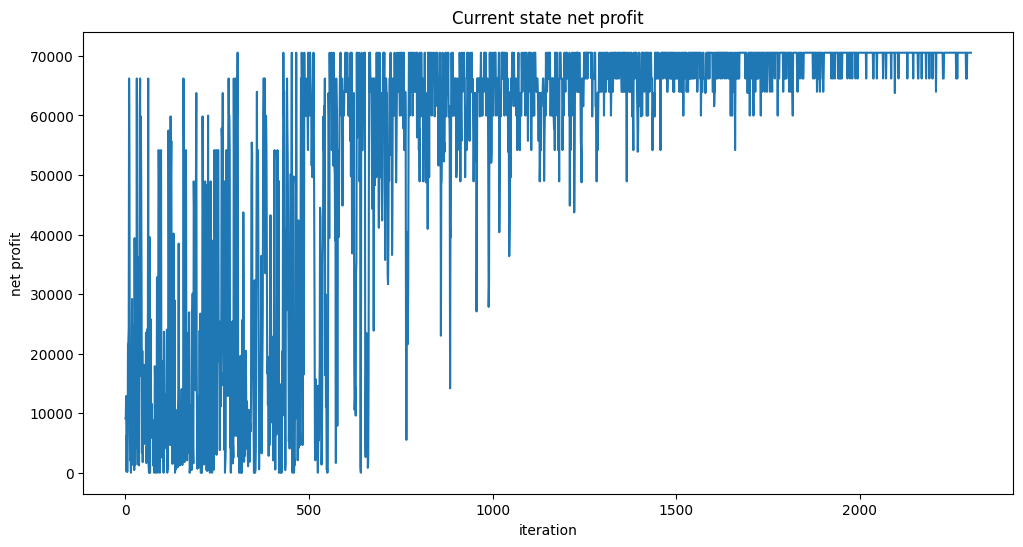

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
ax.plot(net_profit)
ax.set_title("Current state net profit")
ax.set_xlabel("iteration")
ax.set_ylabel("net profit");

In [26]:
threshold = pd.read_csv(os.path.join(res_dir, "threshold.csv"))
threshold.head()

,threshold
0,0.952738
1,0.966502
2,0.988664
3,0.855127
4,0.862211


In [27]:
# https://stackoverflow.com/questions/20105364/how-can-i-make-a-scatter-plot-colored-by-density-in-matplotlib
def scatter_with_gaussian_kde(ax, x, y):
    # https://stackoverflow.com/a/20107592/3015186
    # Answer by Joel Kington

    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)

    ax.scatter(x, y, c=z, s=100)

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
scatter_with_gaussian_kde(ax, threshold.index, threshold[threshold.columns[0]])
ax.set_title("Worse state acceptance threshold")
ax.set_ylabel("threshold");